Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. 2)Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Initial Investigation

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# Assumptions Check

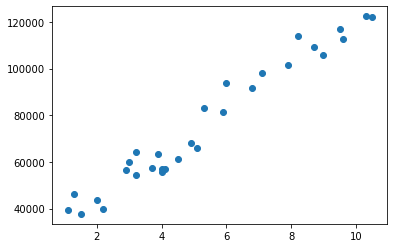

In [7]:
plt.scatter(x='YearsExperience',y='Salary',data=salary_data)

In [8]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model Building and Model Training

In [9]:
model=smf.ols('Salary~YearsExperience',data=salary_data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

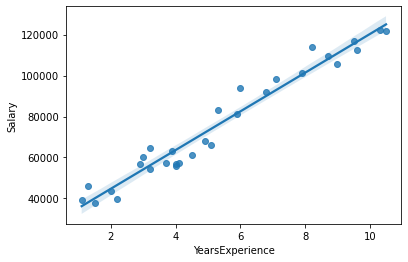

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_data)

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

# Model Testing

Manual Calculation

In [13]:
#y=mx+c
#If x=4,then y=9449.962321*4+25792.200199
#            y=63592.04

Machine Prediction

In [14]:
test_data=pd.DataFrame({'YearsExperience':[3,4,6]})
test_data

,YearsExperience
0,3
1,4
2,6


In [15]:
model.predict(test_data)

0    54142.087163
1    63592.049484
2    82491.974127
dtype: float64

# Model Evaluation

In [16]:
print("R2 score is {}.".format(model.rsquared))
print("Mean Squared Error is {}.".format(model.mse_model))

R2 score is 0.9569566641435086.
Mean Squared Error is 20856849300.33157.


# Data Transformation-log transformation

In [17]:
X_log = np.log(salary_data['YearsExperience'].values.reshape(-1,1))
X_log

array([[0.09531018],
       [0.26236426],
       [0.40546511],
       [0.69314718],
       [0.78845736],
       [1.06471074],
       [1.09861229],
       [1.16315081],
       [1.16315081],
       [1.30833282],
       [1.36097655],
       [1.38629436],
       [1.38629436],
       [1.41098697],
       [1.5040774 ],
       [1.58923521],
       [1.62924054],
       [1.66770682],
       [1.77495235],
       [1.79175947],
       [1.91692261],
       [1.96009478],
       [2.06686276],
       [2.10413415],
       [2.16332303],
       [2.19722458],
       [2.2512918 ],
       [2.2617631 ],
       [2.3321439 ],
       [2.35137526]])

In [18]:
y_log =salary_data['Salary'].values.reshape(-1,1)
y_log

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

# Model Building

In [19]:
X_train_log,X_test_log,Y_train_log,Y_test_log=train_test_split(X_log,y_log,random_state=123,test_size=0.20)

# Model Testing

In [20]:
log_linearmodel=LinearRegression()

In [21]:
log_linearmodel.fit(X_train_log,Y_train_log)

LinearRegression()

In [22]:
print("Intercept value of Log Model is",log_linearmodel.intercept_)
print("Co-efficient Value of Log Model is",log_linearmodel.coef_)

Intercept value of Log Model is [18223.81216554]
Co-efficient Value of Log Model is [[37706.01136755]]


In [23]:
Ylog_train_pred=log_linearmodel.predict(X_train_log)
Ylog_train_pred

array([[ 70495.44310469],
       [ 92131.1683743 ],
       [ 70495.44310469],
       [ 97562.3185053 ],
       [ 85150.18568587],
       [ 47953.39435826],
       [ 44359.62763512],
       [ 99794.09476277],
       [ 79655.97447708],
       [ 74936.57158606],
       [ 90503.31797118],
       [ 67555.8243358 ],
       [ 78147.53287537],
       [101072.38705563],
       [ 21817.57888869],
       [ 28116.52210399],
       [ 96156.96286939],
       [ 69540.80954904],
       [ 85783.91508016],
       [ 81106.38449924],
       [ 59648.09961059],
       [106159.65639005],
       [ 33512.28414101],
       [ 71426.50303572]])

In [24]:
Ylog_test_pred=log_linearmodel.predict(X_test_log)
Ylog_test_pred

array([[ 62081.58982224],
       [106884.79434151],
       [ 58369.80731773],
       [103111.04631546],
       [ 62081.58982224],
       [103505.87726729]])

# Model Evaluation

Training data

In [25]:
r2_score(Y_train_log,Ylog_train_pred)

0.8228891020448672

In [26]:
r2_score(Y_train_log,Ylog_train_pred)

0.8228891020448672

In [27]:
r2_score(Y_test_log,Ylog_test_pred)

0.8921718608399194

In [28]:
mean_squared_error(Y_test_log,Ylog_test_pred)

94481437.5916862

# Data Transformation-sqrt transformation

In [29]:
X_sqrt = np.sqrt(salary_data['YearsExperience'].values.reshape(-1,1))
X_sqrt

array([[1.04880885],
       [1.14017543],
       [1.22474487],
       [1.41421356],
       [1.4832397 ],
       [1.70293864],
       [1.73205081],
       [1.78885438],
       [1.78885438],
       [1.92353841],
       [1.97484177],
       [2.        ],
       [2.        ],
       [2.02484567],
       [2.12132034],
       [2.21359436],
       [2.25831796],
       [2.30217289],
       [2.42899156],
       [2.44948974],
       [2.60768096],
       [2.66458252],
       [2.81069386],
       [2.86356421],
       [2.94957624],
       [3.        ],
       [3.082207  ],
       [3.09838668],
       [3.20936131],
       [3.24037035]])

In [30]:
y_sqrt =salary_data['Salary'].values.reshape(-1,1)
y_sqrt

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

# Model Building

In [31]:
X_train_sqrt,X_test_sqrt,Y_train_sqrt,Y_test_sqrt=train_test_split(X_sqrt,y_sqrt,random_state=123,test_size=0.20)

# Model Training

In [32]:
sqrt_linearmodel=LinearRegression()

In [33]:
sqrt_linearmodel.fit(X_train_sqrt,Y_train_sqrt)

LinearRegression()

In [34]:
print("Intercept value of Sqrt Model is",sqrt_linearmodel.intercept_)
print("Co-efficient Value of Sqrt Model is",sqrt_linearmodel.coef_)

Intercept value of Sqrt Model is [-14910.19558803]
Co-efficient Value of Sqrt Model is [[40715.47723932]]


# Model Testing

In [35]:
Ysqrt_train_pred=sqrt_linearmodel.predict(X_train_sqrt)
Ysqrt_train_pred

array([[ 66520.7588906 ],
       [ 93579.55331231],
       [ 66520.7588906 ],
       [101681.18793565],
       [ 83987.35499978],
       [ 45480.61655268],
       [ 42670.1845223 ],
       [105183.20870787],
       [ 77038.29783523],
       [ 71460.37457747],
       [ 91262.77927097],
       [ 63407.58860721],
       [ 75217.35527985],
       [107236.23612991],
       [ 27792.55719803],
       [ 31512.59098142],
       [ 99528.54647915],
       [ 65496.42937918],
       [ 84821.94828219],
       [ 78823.8721791 ],
       [ 55611.07964488],
       [115760.48166704],
       [ 34955.87634708],
       [ 67532.36232949]])

In [36]:
Ysqrt_test_pred=sqrt_linearmodel.predict(X_test_sqrt)
Ysqrt_test_pred

array([[ 57923.86428673],
       [117023.02961193],
       [ 54425.76371011],
       [110583.33342777],
       [ 57923.86428673],
       [111242.09663657]])

# Model Evaluation

Training Data



In [37]:
r2_score(Y_train_sqrt,Ysqrt_train_pred)

0.9098646988059147

In [38]:
mean_squared_error(Y_train_sqrt,Ysqrt_train_pred)

58166302.44346443

Testing Data



In [39]:
r2_score(Y_test_sqrt,Ysqrt_test_pred)

0.9760774522438873

In [40]:
mean_squared_error(Y_test_sqrt,Ysqrt_test_pred)


20961473.69748974

Model without any transformation- R2 score is 95.6%, Mean Squared Error is 20856849300.33

Model with log transformation- Training Data- R2 score is 82.2%, Mean Squared Error is 114293577.76. Testing Data- R2 score is 89.2%, Mean Squared Error is 94481437.59.

Model with sqrt transformation- Training Data- R2 score is 90.9%, Mean Squared Error is 58166302.44. Testing Data-R2 score is 97.6%, Mean Squared Error is 20961473.69.